In [ ]:
'''
Course Name - Pattern Recognition Lab
Course No. - CSE 4214
Experiment Name - Implementing Minimum Error Rate Classifier
Assignment No - 3
Name - Simon Das
Section - C2
Student ID - 16.01.04.146
'''

'\nCourse Name - Pattern Recognition Lab\nCourse No. - CSE 4214\nExperiment Name - Implementing Minimum Error Rate Classifier\nAssignment No - 3\nName - Simon Das\nSection - C2\nStudent ID - 16.01.04.146\n'

In [ ]:
from google.colab import files

uploaded_train = files.upload()

Saving Data_csv.csv to Data_csv.csv


In [ ]:
import io
import pandas as pd

# reading the training data
data = pd.read_csv(io.BytesIO(uploaded_train['Data_csv.csv']))

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data
train_data, test_data = train_test_split( data, train_size = 0.6, test_size = 0.4, shuffle = True, random_state = 99)

In [ ]:
# dividing the training data into two classes
train_data_xy = train_data.groupby('Class')
class1 = train_data_xy.get_group(1).drop('Class', axis = 1)
class2 = train_data_xy.get_group(2).drop('Class', axis = 1)

In [ ]:
import numpy as np

# calculating mean
class1_mean = class1.mean().to_numpy()
class2_mean = class2.mean().to_numpy()
# calculating co-variance
class1_cov = class1.cov().to_numpy()
class2_cov = class2.cov().to_numpy()
# calculating class probabilities
class1_prob = len(class1) / len(train_data)
class2_prob = len(class2) / len(train_data)

In [ ]:
# reset index of test data
test_data = test_data.reset_index(drop = True)
# seperating test x and test y
test_x = test_data.drop('Class', axis = 1).to_numpy()
test_y = test_data['Class'].to_list()
# variables for storing result
prob_res = []
res_class1 = {'f1': [], 'f2': []}
res_class2 = {'f1': [], 'f2': []}

In [ ]:
for i in range(len(test_x)):
  # class 1 likelihood
  first_part = np.divide(1, np.sqrt(pow((2*3.1416), 2) * np.linalg.det(class1_cov)))
  second_part = np.exp((-0.5) * np.dot(np.transpose(test_x[i] - class1_mean), np.dot(np.linalg.inv(class1_cov), (test_x[i] - class1_mean))))
  class1_likelihood = first_part * second_part
  # class 2 likelihod
  first_part = np.divide(1, np.sqrt(pow((2*3.1416), 2) * np.linalg.det(class2_cov)))
  second_part = np.exp((-0.5) * np.dot(np.transpose(test_x[i] - class2_mean), np.dot(np.linalg.inv(class2_cov), (test_x[i] - class2_mean))))
  class2_likelihood = first_part * second_part
  # classifying
  if (class1_likelihood * class1_prob) > (class2_likelihood * class2_prob):
    prob_res.append(1)
    res_class1['f1'].append(test_x[i][0])
    res_class1['f2'].append(test_x[i][1]) 
  else:
    prob_res.append(2)
    res_class2['f1'].append(test_x[i][0])
    res_class2['f2'].append(test_x[i][1])
                      

In [ ]:
# calculating accuracy
count  = 0
for i in range(len(test_y)):
  if test_y[i] == prob_res[i]:
    count = count + 1

accuracy = (count * 100) / len(test_y)
print("The model accuracy is :", accuracy, end = '')
print("%")

The model accuracy is : 100.0%


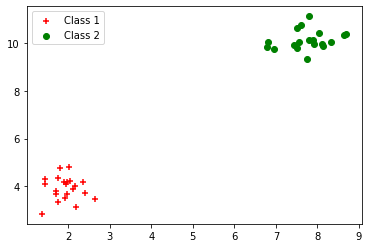

In [ ]:
import matplotlib.pyplot as plt

# plotting classified data points of two classes with different colored marker
plt.scatter(res_class1['f1'], res_class1['f2'], c = 'r', marker = '+', label = 'Class 1')
plt.scatter(res_class2['f1'], res_class2['f2'], c = 'g', marker = 'o', label = 'Class 2')
plt.legend(loc = 'best')
plt.show()